# Homework 1

**Inhalt:** Datensets explorieren, filtern, Felder erstellen

**Nötige Skills:** Erste Schritte mit Pandas

**Lernziele:**
- Review und Übung

# Das Beispiel

Fussballstadien

Quelle/Beschreibung: http://opisthokonta.net/?cat=34

Laden Sie das File von hier herunter: http://opisthokonta.net/wp-content/uploads/2015/03/stadiums_20150302.csv

Speichern Sie das Datenfile an einem geeigneten Ort.

(zum Beispiel in einem Unterordner `dataprojects/stadiums`)

## Vorbereitung

Importieren Sie die benötigten Libraries und stellen Sie die richtigen Settings für Matplotlib ein.

In [1]:
import pandas as pd
%matplotlib inline

## Daten laden

Öffnen Sie das Datenfile in Pandas

In [3]:
df = pd.read_csv("dataprojects/stadiums/stadiums_20150302.csv")

Untersuchen Sie die Struktur der Daten: Länge, Datenfelder, erste Zeilen

In [4]:
len(df)

164

In [5]:
df.columns

Index(['Team', 'FDCOUK', 'City', 'Stadium', 'Capacity', 'Latitude',
       'Longitude', 'Country'],
      dtype='object')

In [18]:
df.head(3)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England


Sind die Daten vollständig?

In [7]:
df.dtypes

Team          object
FDCOUK        object
City          object
Stadium       object
Capacity       int64
Latitude     float64
Longitude    float64
Country       object
dtype: object

## Einfache Auswertungen

Welche Länder sind in der Datenbank vertreten?

Wie viele Stadien sind pro Land in der Datenbank?

In [8]:
df["Country"].value_counts()

England     72
France      26
Spain       25
Germany     23
Scotland    18
Name: Country, dtype: int64

In welchen fünf Städten stehen am meisten Fussballstadien?

In [11]:
df["City"].value_counts().head(5)

London         9
Madrid         3
Glasgow        3
Hamburg        2
Birmingham     2
Name: City, dtype: int64

Wie viele Stadien stehen östlich von Greenwich (also dem Null-Meridian)?

In [66]:
len(df[df["Latitude"]<51.477811])

78

## Ranglisten

Welche zehn Clubs haben die grössten Stadien?

In [23]:
df.sort_values("Capacity", ascending=False).head(10)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany
64,Bayern Munich,Bayern Munich,Munich,Allianz Arena,71000,48.218775,11.624753,Germany
76,Schalke 04,Schalke 04,Gelsenkirchen,Veltins-Arena,61673,51.554503,7.067589,Germany
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland
77,VfB Stuttgart,Stuttgart,Stuttgart,Mercedes-Benz Arena,60441,48.792269,9.232031,Germany
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England


Erstellen Sie eine neue Spalte ("Bezeichnung"), die den Teamnamen und das Stadion enthält (z.B. "Barcelona: Camp Nou")

Hint: Man kann Serien mit Text-Content genauso wie Serien mit Zahlen-Content addieren.

In [99]:
df["Bezeichnung"] = (df["Team"]+": "+df["Stadium"])
df

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England,Arsenal: Emirates Stadium
1,Aston Villa,Aston Villa,Birmingham,Villa Park,42785,52.509167,-1.884722,England,Aston Villa: Villa Park
2,Blackburn Rovers,Blackburn,Blackburn,Ewood Park,31154,53.728611,-2.489167,England,Blackburn Rovers: Ewood Park
3,Bolton Wanderers,Bolton,Bolton,Reebok Stadium,28100,53.580556,-2.535556,England,Bolton Wanderers: Reebok Stadium
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England,Chelsea: Stamford Bridge
5,Everton,Everton,Liverpool,Goodison Park,40157,53.438889,-2.966389,England,Everton: Goodison Park
6,Fulham,Fulham,London,Craven Cottage,25700,51.475000,-0.221667,England,Fulham: Craven Cottage
7,Liverpool,Liverpool,Liverpool,Anfield,45276,53.430819,-2.960828,England,Liverpool: Anfield
8,Manchester City,Man City,Manchester,Etihad Stadium,47405,53.482989,-2.200292,England,Manchester City: Etihad Stadium
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England,Manchester United: Old Trafford


Speichern Sie die zehn Clubs mit den grössten Stadien in einem separaten Dataframe.

In [38]:
groesste_clubs = df.sort_values("Capacity", ascending=False).head(10)[["Stadium","Capacity","Team"]]
groesste_clubs

,Stadium,Capacity,Team
88,Camp Nou,99354,Barcelona
99,Santiago Bernabéu,85454,Real Madrid
65,Signal Iduna Park,80645,Borussia Dortmund
9,Old Trafford,75811,Manchester United
72,Olympiastadion,74244,Hertha BSC
64,Allianz Arena,71000,Bayern Munich
76,Veltins-Arena,61673,Schalke 04
46,Celtic Park,60832,Celtic
77,Mercedes-Benz Arena,60441,VfB Stuttgart
0,Emirates Stadium,60361,Arsenal


Erstellen Sie einen horizontalen Barchart mit der Stadion-Bezeichnung und der Kapazität.

In [116]:
groesste_clubs

,Stadium,Capacity,Team
88,Camp Nou,99354,Barcelona
99,Santiago Bernabéu,85454,Real Madrid
65,Signal Iduna Park,80645,Borussia Dortmund
9,Old Trafford,75811,Manchester United
72,Olympiastadion,74244,Hertha BSC
64,Allianz Arena,71000,Bayern Munich
76,Veltins-Arena,61673,Schalke 04
46,Celtic Park,60832,Celtic
77,Mercedes-Benz Arena,60441,VfB Stuttgart
0,Emirates Stadium,60361,Arsenal


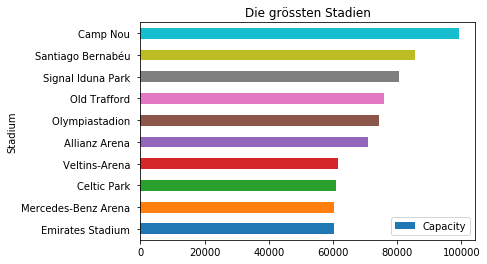

In [118]:
groesste_clubs.sort_values("Capacity").plot(kind="barh", x="Stadium", y="Capacity", title="Die grössten Stadien")

## Gruppierte Auswertung

Ordnen Sie die Länder nach der Durchschnittsgrösse der Stadien.

In [53]:
df.groupby("Country")["Capacity"].mean().sort_values(ascending=False)

Country
Germany     45688.043478
Spain       37407.600000
France      27250.923077
England     25693.458333
Scotland    17261.222222
Name: Capacity, dtype: float64

Welches sind die grössten drei Stadien östlich des Null-Meridians?

In [69]:
df[df["Latitude"]<51.477811].sort_values("Capacity", ascending=False).head(3)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
88,Barcelona,Barcelona,Barcelona,Camp Nou,99354,41.380870,2.122802,Spain,Barcelona : Camp Nou
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain,Real Madrid : Santiago Bernabéu
64,Bayern Munich,Bayern Munich,Munich,Allianz Arena,71000,48.218775,11.624753,Germany,Bayern Munich : Allianz Arena


Welches sind die grössten drei Stadien westlich des Null-Meridians?

In [70]:
df[df["Latitude"]>51.477811].sort_values("Capacity", ascending=False).head(3)

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
65,Borussia Dortmund,Dortmund,Dortmund,Signal Iduna Park,80645,51.492569,7.451842,Germany,Borussia Dortmund : Signal Iduna Park
9,Manchester United,Man United,Stretford,Old Trafford,75811,53.463056,-2.291389,England,Manchester United : Old Trafford
72,Hertha BSC,Hertha,Berlin,Olympiastadion,74244,52.514722,13.239444,Germany,Hertha BSC : Olympiastadion


Erstellen Sie ein Dataframe, das ausschliesslich die Stadien in London und Madrid enthält.

In [86]:
# Weil die nach jedem Stadtnamen einen Leerschlag haben... 
london_madrid = df[(df['City'].str.contains("London")) | (df['City'].str.contains("Madrid"))]
london_madrid

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
0,Arsenal,Arsenal,London,Emirates Stadium,60361,51.555000,-0.108611,England,Arsenal : Emirates Stadium
4,Chelsea,Chelsea,London,Stamford Bridge,42449,51.481667,-0.191111,England,Chelsea : Stamford Bridge
6,Fulham,Fulham,London,Craven Cottage,25700,51.475000,-0.221667,England,Fulham : Craven Cottage
12,Queens Park Rangers,QPR,London,Loftus Road,18439,51.509167,-0.232222,England,Queens Park Rangers : Loftus Road
16,Tottenham Hotspur,Tottenham,London,White Hart Lane,36230,51.603333,-0.065833,England,Tottenham Hotspur : White Hart Lane
28,Crystal Palace,Crystal Palace,London,Selhurst Park,26309,51.398333,-0.085556,England,Crystal Palace : Selhurst Park
36,Millwall,Millwall,London,The Den,20146,51.485953,-0.050950,England,Millwall : The Den
43,West Ham United,West Ham,London,Boleyn Ground,35303,51.531944,0.039444,England,West Ham United : Boleyn Ground
87,Atlético Madrid,Ath Madrid,Madrid,Vicente Calderón,54851,40.401719,-3.720606,Spain,Atlético Madrid : Vicente Calderón
98,Rayo Vallecano,Vallecano,Madrid,Campo de Vallecas,15489,40.391944,-3.658961,Spain,Rayo Vallecano : Campo de Vallecas


Bei den Städten hat es zT Leerschläge drin. Führen Sie folgenden Code aus, um sie zu entfernen:

In [98]:
df["City"] = df["City"].str.strip()
df["Team"] = df["Team"].str.strip()
#df["City"] = df["City"].replace(" ","")

Erstellen Sie ein Dataframe, das nur die Stadien aus Madrid und Glasgow enthält.

In [100]:
madrid_glasgow = df[(df["City"] == "Madrid") | (df["City"] == "Glasgow")]
madrid_glasgow

,Team,FDCOUK,City,Stadium,Capacity,Latitude,Longitude,Country,Bezeichnung
46,Celtic,Celtic,Glasgow,Celtic Park,60832,55.849711,-4.205589,Scotland,Celtic: Celtic Park
52,Partick Thistle,Partick,Glasgow,Firhill Stadium,10887,55.881556,-4.269639,Scotland,Partick Thistle: Firhill Stadium
53,Rangers,Rangers,Glasgow,Ibrox Stadium,51082,55.853206,-4.309258,Scotland,Rangers: Ibrox Stadium
87,Atlético Madrid,Ath Madrid,Madrid,Vicente Calderón,54851,40.401719,-3.720606,Spain,Atlético Madrid: Vicente Calderón
98,Rayo Vallecano,Vallecano,Madrid,Campo de Vallecas,15489,40.391944,-3.658961,Spain,Rayo Vallecano: Campo de Vallecas
99,Real Madrid,Real Madrid,Madrid,Santiago Bernabéu,85454,40.453060,-3.688350,Spain,Real Madrid: Santiago Bernabéu


Vergleichen Sie die Stadien der beiden Städe anhand des Medianwerts.

In [101]:
madrid_glasgow.groupby("City")["Capacity"].median()

City
Glasgow    51082
Madrid     54851
Name: Capacity, dtype: int64

## Ein Histogramm

Wie ist die Verteilung der Stadiongrösse? Zeichnen Sie ein Histogramm mit genügend feiner Aufgliederung.

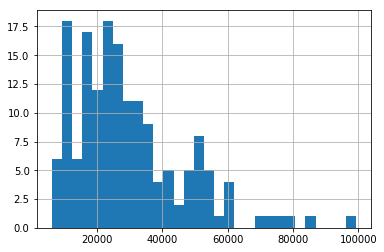

In [107]:
df["Capacity"].hist(bins=30)

## Ein hübscher Scatterplot

Man würde das normalerweise anders machen, aber da wir hier schon die Koordinaten haben...

- Definieren Sie einen Parameter "area" für die Punktegrösse, der sich an der Kapazität orientiert.

In [110]:
area = df["Capacity"] / 1000

- Und plotten sie die Stadien auf einer "Landkarte" (Longitude auf der x-Achse, Latitude auf der y-Achse)

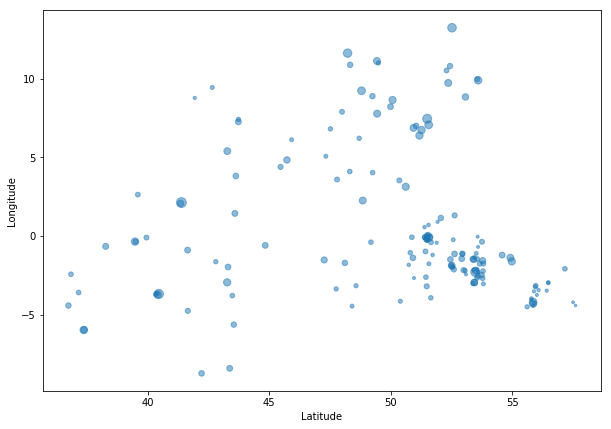

In [111]:
df.plot(kind='scatter', x='Latitude', y='Longitude', s=area, alpha=0.5, figsize=(10,7))